<a href="https://colab.research.google.com/github/hinafarooq21/F1-Lap-Predictor--Capstone/blob/main/EDA_F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA & Predictive Model
> This file contains EDA and the predictive model as well as explanations of how it was achieved

In [ ]:
# Importing necessary packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


# for train-test splitting
from sklearn.model_selection import train_test_split  # to perform our train-test split

# for modelling
import statsmodels.api as sm  # for the linear regression model
import statsmodels.tools      # for the evaluation of our model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix
# to scale features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [ ]:
# Import csv
df = pd.read_csv('clean_circuits.csv')

In [ ]:
df.head(22)

,Circuit,Type,Direction,Location,Country,Length,Turns,Grands Prix,Season(s),Grands Prix held,...,Driver,Car,Year,Race Laps,Race Dist,DistTurn1,Longst Straight,Elevation,Width,Type_bool
0,Adelaide Street Circuit,Street circuit,1,Adelaide,Australia,3780.0,16.0,Australian Grand Prix,"1985, 1995",11.0,...,Damon Hill,Williams FW15C,1993.0,82.0,309960.0,300.0,800.000000,3.00,12.0,0
1,Ain-Diab Circuit,Road circuit,1,Casablanca,Morocco,7618.0,18.0,Moroccan Grand Prix,1958,1.0,...,Stirling Moss,Vanwall VW 5,1958.0,53.0,403754.0,300.0,1000.000000,0.00,10.0,0
2,Aintree Motor Racing Circuit,Road circuit,1,Aintree,United Kingdom,4828.0,12.0,British Grand Prix,"1955, 1957, 1959, 1961, 1962",5.0,...,Jim Clark,Lotus 25,1963.0,75.0,362100.0,400.0,1600.000000,0.00,12.0,0
3,Albert Park Circuit,Street circuit,1,Melbourne,Australia,5278.0,16.0,Australian Grand Prix,"1996, 2019, 2022, 2024",27.0,...,Charles Leclerc,Ferrari SF-24,2024.0,58.0,307574.0,350.0,300.000000,2.60,14.0,0
4,Algarve International Circuit,Race circuit,1,Portimao,Portugal,4653.0,15.0,Portuguese Grand Prix,"2020, 2021",2.0,...,Lewis Hamilton,Mercedes W11,2020.0,66.0,306826.0,400.0,900.000000,24.00,12.0,1
5,Autodromo do Estoril,Race circuit,1,Estoril,Portugal,4360.0,13.0,Portuguese Grand Prix,"1984, 1996",13.0,...,David Coulthard,Williams FW16B,1994.0,71.0,309560.0,300.0,1020.000000,0.00,10.0,1
6,Autodromo Hermanos RodrÃÂ­guez,Race circuit,1,Mexico City,Mexico,4304.0,17.0,"Mexican Grand Prix, Mexico City Grand Prix","1963, 1970, 1986, 1992, 2015, 2019, 2021, 2024",24.0,...,Valtteri Bottas,Mercedes W12,2021.0,71.0,305354.0,890.0,1200.000000,2.80,9.0,1
7,Autodromo Internacional do Rio de Janeiro,Race circuit,0,Rio de Janeiro,Brazil,5031.0,11.0,Brazilian Grand Prix,"1978, 1981, 1989",10.0,...,Riccardo Patrese,Williams FW12C,1989.0,61.0,306891.0,250.0,1184.676471,0.00,12.0,1
8,Autodromo Internazionale del Mugello,Race circuit,1,Scarperia e San Piero,Italy,5245.0,14.0,Tuscan Grand Prix,2020,1.0,...,Lewis Hamilton,Mercedes W11,2020.0,59.0,309457.0,700.0,1141.000000,41.00,9.6,1
9,Autodromo Internazionale Enzo e Dino Ferrari,Race circuit,0,Imola,Italy,4909.0,19.0,"Italian Grand Prix, San Marino Grand Prix, Emi...","1980, 2006, 2020, 2022, 2024",31.0,...,Lewis Hamilton,Mercedes W11,2020.0,63.0,309049.0,399.0,550.000000,33.32,12.0,1


## Correlation Matrix
From this correlation matrix, we can gather the following key insights:

* Lap Times and Length of circuit has very strong correlation, as length increase so do lap times.
* Lap Times also have a very positive correlation with Total Race Distance and Longest straight.
* Lap times have negative correlations with number of race laps and type of circuit.

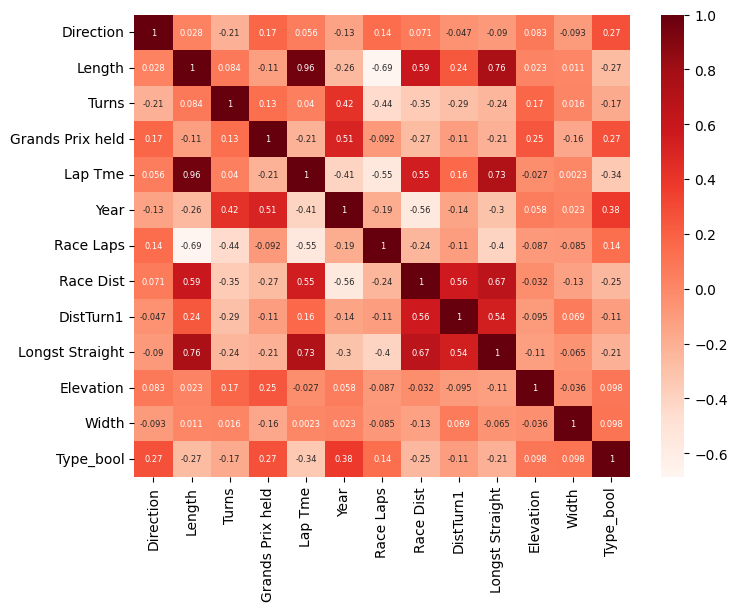

In [ ]:
# Visualise the correlations
# Calculate the correlation between each numerical column
df_corr = df.corr(numeric_only = True)

# Plot size
plt.figure(figsize=(8, 6))

# Heatmap of the correlations
sns.heatmap(data= df_corr,
            annot= True,
            #mask= np.triu(df_corr),
            annot_kws={"size": 6},
            cmap= "Reds")

# Hide the axes
plt.show()

## Scatter Plot

In [ ]:
# ## Pairplot of all numeric features
# # Plot size
# plt.figure(figsize = (8, 8))

# # Pairplot
# sns.pairplot(data= df,
#              palette= 'Reds',
#              diag_kind= 'hist')

# # Hide the axes
# plt.show()

## Distribution of figures

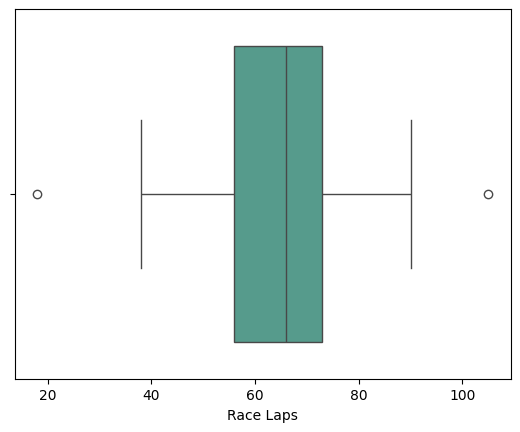

In [ ]:
# Box plot for race Laps
sns.boxplot(df['Race Laps'], orient="h", color = '#4ba693') # Color to match crest palette
plt.show()

In [ ]:
df['Length'].mean()

5332.077922077922

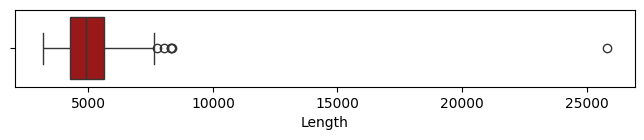

In [ ]:
plt.figure(figsize=(8, 1))
sns.boxplot(df['Length'], orient="h", color='#AF0204')
plt.show()


In [ ]:
df.drop(59, inplace=True)
df.drop(21, inplace=True)

## Train-Test Split the model

In [ ]:
df.columns

Index(['Circuit', 'Type', 'Direction', 'Location', 'Country', 'Length',
       'Turns', 'Grands Prix', 'Season(s)', 'Grands Prix held', 'Lap Tme',
       'Driver', 'Car', 'Year', 'Race Laps', 'Race Dist', 'DistTurn1',
       'Longst Straight', 'Elevation', 'Width', 'Type_bool'],
      dtype='object')

In [ ]:
df.dtypes

,0
Circuit,object
Type,object
Direction,int64
Location,object
Country,object
Length,float64
Turns,float64
Grands Prix,object
Season(s),object
Grands Prix held,float64


In [ ]:
df.columns

Index(['Circuit', 'Type', 'Direction', 'Location', 'Country', 'Length',
       'Turns', 'Grands Prix', 'Season(s)', 'Grands Prix held', 'Lap Tme',
       'Driver', 'Car', 'Year', 'Race Laps', 'Race Dist', 'DistTurn1',
       'Longst Straight', 'Elevation', 'Width', 'Type_bool'],
      dtype='object')

In [ ]:
# Separating into necessary columns for X and y
numeric_columns = df[['Direction', 'Length', 'Turns', 'Grands Prix held', 'Lap Tme', 'Year', 'Race Laps', 'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation', 'Width', 'Type_bool']]
feature_cols = numeric_columns.columns.tolist()  # get ALL the column names as a list
feature_cols.remove('Lap Tme')  # remove the target variable 'Lap Tme'

In [ ]:
df[feature_cols].shape

(75, 12)

In [ ]:
df[feature_cols].head()

,Direction,Length,Turns,Grands Prix held,Year,Race Laps,Race Dist,DistTurn1,Longst Straight,Elevation,Width,Type_bool
0,1,3780.0,16.0,11.0,1993.0,82.0,309960.0,300.0,800.0,3.0,12.0,0
1,1,7618.0,18.0,1.0,1958.0,53.0,403754.0,300.0,1000.0,0.0,10.0,0
2,1,4828.0,12.0,5.0,1963.0,75.0,362100.0,400.0,1600.0,0.0,12.0,0
3,1,5278.0,16.0,27.0,2024.0,58.0,307574.0,350.0,300.0,2.6,14.0,0
4,1,4653.0,15.0,2.0,2020.0,66.0,306826.0,400.0,900.0,24.0,12.0,1


## Splitting the data

In [ ]:
# Split the dataset to create X, and y
X = df[feature_cols]
y = df['Lap Tme']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,   # features
                                                    y,   # target
                                                    test_size=0.3,  # 20% for testing
                                                    random_state=42)

**Checking values after splittling**

In [ ]:
# Testing that we have the correct number of observations across Train and Test
print(f'Same number of records in Train: {X_train.shape[0] == y_train.shape[0]}')
print(f'Same number of records in Test: {X_test.shape[0] == y_test.shape[0]}')

Same number of records in Train: True
Same number of records in Test: True


## Ridge

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
prediction = lr.predict(X_test_s)
#actual
actual = y_test

train_score_lr = lr.score(X_train_s, y_train)
test_score_lr = lr.score(X_test_s, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.9108364060138863
The test score for lr model is 0.902348371811328


In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train_s,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_s, y_train)
test_score_ridge = ridgeReg.score(X_test_s, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.8940157349554498
The test score for ridge model is 0.8523433490757943


In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train_s,y_train)
train_score_ls =lasso.score(X_train_s,y_train)
test_score_ls =lasso.score(X_test_s,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.47550414365508353
The test score for ls model is 0.4416872307677786


## Linear *regression*

In [ ]:
def feature_eng(df):
    df = df.copy()
    ss = StandardScaler()

    # Scale selected features
    df[['Direction', 'Length', 'Turns', 'Grands Prix held', 'Year', 'Race Laps',
       'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation', 'Width',
       'Type_bool' ,'Elevation']] = ss.fit_transform(
    df[['Direction', 'Length', 'Turns', 'Grands Prix held', 'Year', 'Race Laps',
       'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation', 'Width',
       'Type_bool' ,'Elevation']]
    )

    # Add interaction terms
    df['racedl'] = df['Race Dist'] * df['Longst Straight'] * df['Length']
    df['DLDT'] = df['DistTurn1'] * df['Longst Straight']
    df['Length_Turns'] = df['Length'] * df['Turns']
    df['RaceDist_per_Turn'] = df['Length'] / (df['Turns'] + 1e-5)  # Avoid division by zero
    df['Dist_Turns'] = df['Race Dist'] * df['Turns']
    df['Straight_elevation'] = df['Elevation'] * df['Longst Straight']
    df['Lap_Length'] = df['Race Laps'] * df['Length']


    # Polynomial terms
    df['Length_squared'] = df['Length'] ** 2
    df['Turns_squared'] = df['Turns'] ** 2

    # Add a constant column for statsmodels
    df = sm.add_constant(df)

    return df


In [ ]:
X_train.columns

Index(['Direction', 'Length', 'Turns', 'Grands Prix held', 'Year', 'Race Laps',
       'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation', 'Width',
       'Type_bool'],
      dtype='object')

In [ ]:
X_train_fe = feature_eng(X_train)

In [ ]:
X_train_fe.columns

Index(['const', 'Direction', 'Length', 'Turns', 'Grands Prix held', 'Year',
       'Race Laps', 'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation',
       'Width', 'Type_bool', 'racedl', 'DLDT', 'Length_Turns',
       'RaceDist_per_Turn', 'Dist_Turns', 'Straight_elevation', 'Lap_Length',
       'Length_squared', 'Turns_squared'],
      dtype='object')

In [ ]:
feature_cols =  ['const',
                 #'Direction',
                 #'Length',
                 #'Turns',
                 'Grands Prix held',  # Getting rid of this effects the MSE
                 'Year',
                 'Race Laps',
                 'Race Dist',
                 #'DistTurn1',
                 #'Longst Straight',
                 #'Elevation',
                 #'Width',
                 #'DLDT',
                 'Type_bool',
                 'racedl',
                 'Length_Turns',
                 #'RaceDist_per_Turn',
                 #'Lap_Length',
                 'Dist_Turns',
                 #'Straight_elevation',
                 'Length_squared',
                 #'Turns_squared'
                 ]
# Train the model and check its summary
# Create the model object
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols])
# fit the model
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lap Tme   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     60.24
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           3.97e-21
Time:                        10:51:32   Log-Likelihood:                -167.11
No. Observations:                  52   AIC:                             354.2
Df Residuals:                      42   BIC:                             373.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               88.0691      1.368     64.393      0.000      85.309      90.829
Grands Prix held    -1.8964      1.112     -1.705      0.096      -4.141       0.348
Year                -7.4419      1.809     -4.114      0.000     -11.092      -3.791
Race Laps          -13.1125      1.201    -10.920      0.000     -15.536     -10.689
Race Dist            6.8671      1.623      4.232      0.000       3.592      10.142
Type_bool           -2.1011      1.201     -1.750      0.087      -4.524       0.322
racedl              -1.3628      0.288     -4.733      0.000      -1.944      -0.782
Length_Turns         1.2922      0.661      1.956      0.057      -0.041       2.626
Dist_Turns          -5.4526      1.652     -3.301      0.002      -8.786      -2.119
Length_squared       3.6981      1.099      3.366      0.002       1.481       5.915
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                0.981
Skew:                          -0.197   Prob(JB):                        0.612
Kurtosis:                       3.546   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Let's check the performance of our model

y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(f'The TRAINING RMSE is: {rmse}')

The TRAINING RMSE is: 6.018199711951319


In [ ]:
def mape(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [ ]:
## We apply feature_eng to the X_test set!
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols]

In [ ]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

6.490730013697982


In [ ]:
print(f'The Training MAE is: {statsmodels.tools.eval_measures.meanabs(y_train, y_pred)}')
print(f'The Training MSE is: {statsmodels.tools.eval_measures.mse(y_train, y_pred)}')
print(f'The Training mean error is:{statsmodels.tools.eval_measures.bias(y_train, y_pred)}')
print(f'The Training Mape is: {round(mape(y_train, y_pred), 2)}% off the actual value')

The Training MAE is: 4.567093968905535
The Training MSE is: 36.21872777293095
The Training mean error is:2.8052773779143957e-13
The Training Mape is: 5.3% off the actual value


In [ ]:
print(f'The Testing MAE is: {statsmodels.tools.eval_measures.meanabs(y_test, y_test_pred)}')
print(f'The Testing MSE is: {statsmodels.tools.eval_measures.mse(y_test, y_test_pred)}')
print(f'The Testing mean error is:{statsmodels.tools.eval_measures.bias(y_test, y_test_pred)}')
print(f'The Testing Mape is: {round(mape(y_test, y_test_pred), 2)}% off the actual value')

The Testing MAE is: 4.994934374829219
The Testing MSE is: 42.12957611071981
The Testing mean error is:-1.653848366603457
The Testing Mape is: 5.42% off the actual value


In [ ]:
# Create the comparison DataFrame
train_comparison = pd.DataFrame({
    'Actual': y_train,         # True target values
    'Predicted': y_pred  # Predicted values
})

# Display only the first 5 rows
train_comparison.sample(5)

,Actual,Predicted
38,75.5,75.732080
26,161.0,160.034685
27,104.7,105.463202
44,76.6,70.809860
70,95.8,92.970694


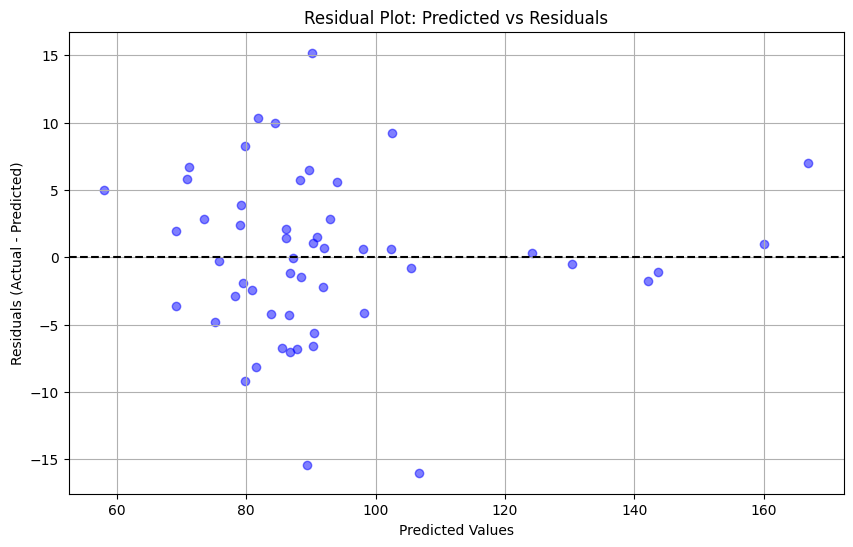

In [ ]:
# Calculate residuals
train_comparison['Residuals'] = train_comparison['Actual'] - train_comparison['Predicted']

# Create the residual plot
plt.figure(figsize=(10, 6))

# Plot residuals
plt.scatter(train_comparison['Predicted'], train_comparison['Residuals'], color='blue', alpha=0.5)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Adding titles and labels
plt.title('Residual Plot: Predicted vs Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()


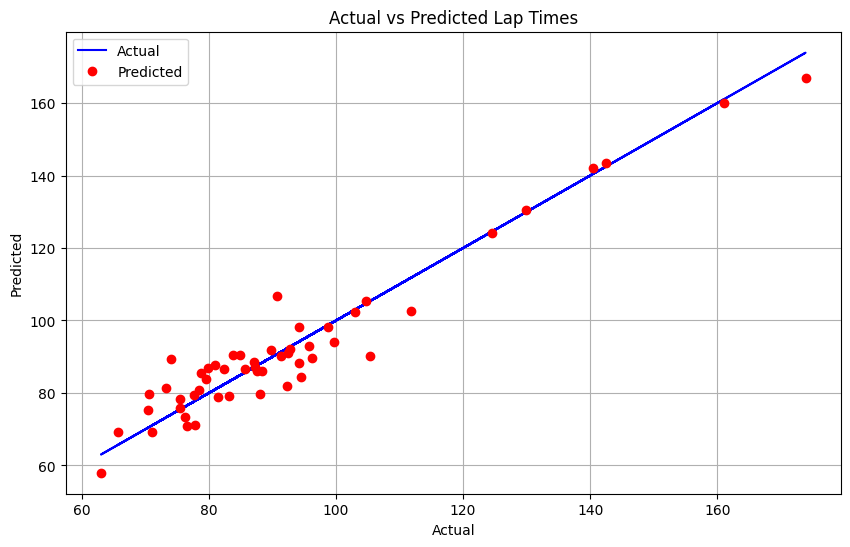

In [ ]:
# Plot the Actual values as a line and Predicted values as dots
plt.figure(figsize=(10, 6))

# Plot the actual values as a line
plt.plot(train_comparison['Actual'], train_comparison['Actual'], label='Actual', color='blue', linestyle='-', marker='')

# Plot the predicted values as dots
plt.plot(train_comparison['Actual'], train_comparison['Predicted'], label='Predicted', color='red', linestyle='None', marker='o')

# Adding titles and labels
plt.title('Actual vs Predicted Lap Times')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Checking for outliers
residuals = y_train - y_pred

# Identify outliers in the residuals using IQR
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = X_train_fe[(residuals < lower_bound) | (residuals > upper_bound)]

# Print outliers and their corresponding rows
print(f"Outliers in the residuals:\n{outliers}")

# Optionally, view the rows that correspond to the outliers
print(f"Outlier rows in the training set:\n{X_train_fe.loc[outliers.index]}")

Outliers in the residuals:
    const  Direction    Length     Turns  Grands Prix held      Year  \
39    1.0  -1.570563 -0.992654 -0.143922         -0.827088 -0.629648   
47    1.0  -1.570563  0.864650  2.229031         -0.642766  0.956011   
72    1.0   0.636715 -1.154443 -0.691526         -0.765647 -0.201092   

    Race Laps  Race Dist  DistTurn1  Longst Straight  ...  Type_bool  \
39   0.208184  -1.330293  -0.376805        -1.217171  ...  -1.317893   
47  -1.175536  -0.228624  -0.437471        -0.479564  ...  -1.317893   
72   0.208184  -0.299901  -0.275695         0.073641  ...   0.758787   

      racedl      DLDT  Length_Turns  RaceDist_per_Turn  Dist_Turns  \
39 -1.607299  0.458636      0.142864           6.897664    0.191458   
47  0.094800  0.209795      1.927332           0.387902   -0.509611   
72  0.025496 -0.020302      0.798328           1.669438    0.207389   

    Straight_elevation  Lap_Length  Length_squared  Turns_squared  
39            0.945319   -0.206655        

In [ ]:
X_train_fe.columns

Index(['const', 'Direction', 'Length', 'Turns', 'Grands Prix held', 'Year',
       'Race Laps', 'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation',
       'Width', 'Type_bool', 'racedl', 'DLDT', 'Length_Turns',
       'RaceDist_per_Turn', 'Dist_Turns', 'Straight_elevation', 'Lap_Length',
       'Length_squared', 'Turns_squared'],
      dtype='object')

In [ ]:
cols = ['const', 'Direction', 'Length', 'Turns', 'Grands Prix held', 'Year',
       'Race Laps', 'Race Dist', 'DistTurn1', 'Longst Straight', 'Elevation',
       'Width', 'Type_bool', 'racedl', 'DLDT', 'Length_Turns',
       'RaceDist_per_Turn', 'Length_squared', 'Turns_squared']
VIF = pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)


In [ ]:
VIF.sort_values(ascending=False)

,0
racedl,200.634979
DLDT,150.626788
Length,37.897741
Race Laps,21.088667
Length_Turns,17.816143
Race Dist,15.893305
Turns_squared,14.937624
DistTurn1,12.073202
Length_squared,8.983416
Year,6.988265


In [ ]:
# Creating coefficient csv
coefficients = pd.DataFrame(results.params)
coefficients.reset_index(inplace=True)
coefficients.columns = ['Features', 'Coefficient']
coefficients.to_csv('coefficients.csv')

print(coefficients)

           Features  Coefficient
0             const    88.069107
1  Grands Prix held    -1.896392
2              Year    -7.441924
3         Race Laps   -13.112486
4         Race Dist     6.867117
5         Type_bool    -2.101098
6            racedl    -1.362798
7      Length_Turns     1.292200
8        Dist_Turns    -5.452637
9    Length_squared     3.698070


In [ ]:
scaler = StandardScaler()
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Creating a function

In [ ]:
# import math
# import pandas as pd
# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler

# def lap_time_model():
#     # Load coefficients
#     coeffs_df = pd.read_csv('coefficients.csv')
#     coeffs = coeffs_df['Coefficient'].to_dict()

#     def valid_input(prompt, min_value=None, max_value=None):
#         """ Function to validate user input within a range """
#         while True:
#             try:
#                 value = float(input(prompt))
#                 if min_value is not None and value < min_value:
#                     print(f"The value cannot be less than {min_value}")
#                 elif max_value is not None and value > max_value:
#                     print(f"The value cannot be greater than {max_value}")
#                 else:
#                     return value
#             except ValueError:
#                 print("Invalid input. Please enter a valid number.")

#     # Collect user input
#     grand_prix_held = 1
#     length = valid_input("Circuit Length: ", min_value=3500, max_value=7000)
#     turns = valid_input("Number of corners: ", min_value=8, max_value=30)
#     year = valid_input("Year: ", min_value=1950, max_value=2030)
#     type_circuit = valid_input("Race Track - 1, Street circuit - 0, Type of circuit: ", min_value=0, max_value=1)
#     longest_straight = valid_input("Longest straight in meters: ", min_value=300, max_value=2000)
#     turn1_dist = valid_input("Distance to first turn in meters: ", min_value=250, max_value=2000)

#     race_laps = math.ceil(305000/length)
#     race_dist = length * race_laps

#     print(race_laps)
#     print(race_dist)

#     # Create DataFrame
#     columns = ['Grands Prix held', 'Length', 'Turns', 'Year', 'Type_bool', 'Longest Straight',
#                'Turn1 Dist', 'Race Laps', 'Race Dist']

#     input_data = pd.DataFrame([[grand_prix_held, length, turns, year, type_circuit,
#                                 longest_straight, turn1_dist, race_laps, race_dist]], columns=columns)

#     # Add interaction terms
#     input_data['racedl'] = input_data['Race Dist'] * input_data['Longest Straight'] * input_data['Length']
#     input_data['Length_Turns'] = input_data['Length'] * input_data['Turns']
#     input_data['Dist_Turns'] = input_data['Race Dist'] * input_data['Turns']
#     input_data['Length_squared'] = input_data['Length'] ** 2

#     # Add a constant
#     input_data = sm.add_constant(input_data, has_constant='add')

#     # Apply feature scaling
#     try:
#       input_data_scaled = input_data.drop(columns=['const'])
#       input_data_scaled = ss.transform(input_data_scaled)
#       input_data_scaled = pd.DataFrame(input_data_scaled, columns=input_data_scaled.columns)
#       input_data_scaled['const'] = input_data['const']
#     except:
#       input_data_scaled = input_data.copy()
#     print("Processed input data:")
#     print(input_data_scaled.head())

#     prediction = sum(coeffs.get(feature, 0) * input_data_scaled[feature] for feature in input_data_scaled.columns)
#     print(f"Predicted Lap Time: {prediction}")

# lap_time_model()